In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle

## Load Dataset

In [2]:
df = pd.read_csv("Autism_2018.csv")

In [3]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

## Check Missing Value

In [5]:
df.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [6]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [7]:
df.count()

Case_No                   1054
A1                        1054
A2                        1054
A3                        1054
A4                        1054
A5                        1054
A6                        1054
A7                        1054
A8                        1054
A9                        1054
A10                       1054
Age_Mons                  1054
Qchat-10-Score            1054
Sex                       1054
Ethnicity                 1054
Jaundice                  1054
Family_mem_with_ASD       1054
Who completed the test    1054
Class/ASD Traits          1054
dtype: int64

In [8]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


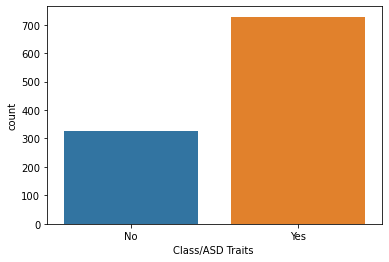

In [82]:
df['Class/ASD Traits '].value_counts()
ax = sns.countplot(data=df, x="Class/ASD Traits ")

## Preprocessing Data

### Drop Unused Columns

In [10]:
df.drop(['Case_No'], axis=1, inplace=True)

# drop kolom Qchat-10-score (karena merupakan summarize A1-A10 )**
df.drop(['Qchat-10-Score'], axis=1, inplace=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes


In [11]:
print(df['Ethnicity'].unique())

['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']


In [12]:
# Replace south asian as asian
df.replace('south asian', 'asian', inplace=True)

# Select only Asian Ethnic, then drop Ethnicity columns
df_asian = df.loc[df['Ethnicity'] == 'asian']
df_asian = df_asian.drop(['Ethnicity'], axis=1)
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
6,1,0,0,1,1,1,0,0,1,0,33,m,yes,no,family member,Yes
7,0,1,0,0,1,0,1,1,1,1,33,m,yes,no,family member,Yes
8,0,0,0,0,0,0,1,0,0,1,36,m,no,no,family member,No
9,1,1,1,0,1,1,0,1,1,1,22,m,no,no,Health Care Professional,Yes
45,0,0,0,0,0,0,1,0,0,1,19,m,no,no,family member,No


### Checking Inconsistent categorical values

In [13]:
cat_columns = list(df_asian.columns[11:15])
for col in cat_columns:
    print(f"""{col} : {df_asian[col].unique()}""")

Sex : ['m' 'f']
Jaundice : ['yes' 'no']
Family_mem_with_ASD : ['no' 'yes']
Who completed the test : ['family member' 'Health Care Professional' 'Health care professional']


In [14]:
# Sex column
df_asian['Sex'].replace('m', 'male', inplace= True)
df_asian['Sex'].replace('f', 'female', inplace= True)

In [15]:
# Who_com_the_test columns
df_asian['Who completed the test'].replace('Health care professional', 'health care professional', inplace=True)
df_asian['Who completed the test'].replace('Health Care Professional', 'health care professional', inplace=True)

In [16]:
for col in cat_columns:
    print(f"""{col} : {df_asian[col].unique()}""")

Sex : ['male' 'female']
Jaundice : ['yes' 'no']
Family_mem_with_ASD : ['no' 'yes']
Who completed the test : ['family member' 'health care professional']


### Handling Categorical Values

In [17]:
# Features Encoding (One-Hot-Encoder)
df_asian = pd.get_dummies(data=df_asian, columns=cat_columns)
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
6,1,0,0,1,1,1,0,0,1,0,33,Yes,0,1,0,1,1,0,1,0
7,0,1,0,0,1,0,1,1,1,1,33,Yes,0,1,0,1,1,0,1,0
8,0,0,0,0,0,0,1,0,0,1,36,No,0,1,1,0,1,0,1,0
9,1,1,1,0,1,1,0,1,1,1,22,Yes,0,1,1,0,1,0,0,1
45,0,0,0,0,0,0,1,0,0,1,19,No,0,1,1,0,1,0,1,0


In [18]:
# Label Encoding (Label Encoder)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df_asian['Class/ASD Traits '] = le.fit_transform(df_asian['Class/ASD Traits '])
df_asian.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
6,1,0,0,1,1,1,0,0,1,0,33,1,0,1,0,1,1,0,1,0
7,0,1,0,0,1,0,1,1,1,1,33,1,0,1,0,1,1,0,1,0
8,0,0,0,0,0,0,1,0,0,1,36,0,0,1,1,0,1,0,1,0
9,1,1,1,0,1,1,0,1,1,1,22,1,0,1,1,0,1,0,0,1
45,0,0,0,0,0,0,1,0,0,1,19,0,0,1,1,0,1,0,1,0
56,1,0,0,0,0,1,1,0,1,1,32,1,1,0,1,0,1,0,1,0
57,0,0,0,1,1,1,1,1,1,0,25,1,0,1,1,0,1,0,1,0
68,1,0,1,0,0,0,0,0,0,0,23,0,0,1,1,0,0,1,1,0
69,1,0,1,1,1,1,1,0,1,1,18,1,1,0,0,1,0,1,1,0
71,0,0,1,1,1,1,1,0,1,1,34,1,0,1,1,0,1,0,1,0


### Handling Numerical Values (Min-Max Scaler)

In [20]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [21]:
# save mx scaler for future predict data
new_scaler = mx.fit(df_asian[['Age_Mons']])
with open ('mx_scaler.pkl', 'wb') as mx_scl:
    pickle.dump(new_scaler, mx_scl)

In [22]:
df_asian['Age_Mons'] = mx.fit_transform(df_asian[['Age_Mons']])
df_asian.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
6,1,0,0,1,1,1,0,0,1,0,0.875000,1,0,1,0,1,1,0,1,0
7,0,1,0,0,1,0,1,1,1,1,0.875000,1,0,1,0,1,1,0,1,0
8,0,0,0,0,0,0,1,0,0,1,1.000000,0,0,1,1,0,1,0,1,0
9,1,1,1,0,1,1,0,1,1,1,0.416667,1,0,1,1,0,1,0,0,1
45,0,0,0,0,0,0,1,0,0,1,0.291667,0,0,1,1,0,1,0,1,0
56,1,0,0,0,0,1,1,0,1,1,0.833333,1,1,0,1,0,1,0,1,0
57,0,0,0,1,1,1,1,1,1,0,0.541667,1,0,1,1,0,1,0,1,0
68,1,0,1,0,0,0,0,0,0,0,0.458333,0,0,1,1,0,0,1,1,0
69,1,0,1,1,1,1,1,0,1,1,0.250000,1,1,0,0,1,0,1,1,0
71,0,0,1,1,1,1,1,0,1,1,0.916667,1,0,1,1,0,1,0,1,0


In [23]:
df_asian['Class/ASD Traits '].value_counts()

1    249
0    110
Name: Class/ASD Traits , dtype: int64

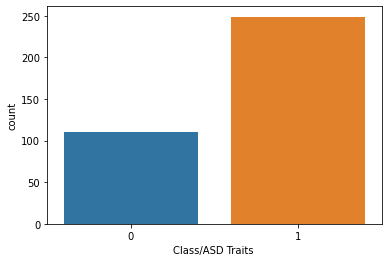

In [24]:
df_asian['Class/ASD Traits '].value_counts()
ax = sns.countplot(data=df_asian, x="Class/ASD Traits ")

## Feature Selection

In [25]:
# reset index
df_asian.reset_index(inplace=True)
df_asian.drop(['index'], axis=1, inplace=True)

In [26]:
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
0,1,0,0,1,1,1,0,0,1,0,0.875000,1,0,1,0,1,1,0,1,0
1,0,1,0,0,1,0,1,1,1,1,0.875000,1,0,1,0,1,1,0,1,0
2,0,0,0,0,0,0,1,0,0,1,1.000000,0,0,1,1,0,1,0,1,0
3,1,1,1,0,1,1,0,1,1,1,0.416667,1,0,1,1,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,1,0.291667,0,0,1,1,0,1,0,1,0


In [27]:
corr = df_asian.corr()
feature_corr = abs(corr['Class/ASD Traits ']).sort_values(ascending=False)
feature_corr

Class/ASD Traits                                   1.000000
A5                                                 0.575094
A9                                                 0.557747
A6                                                 0.477838
A7                                                 0.430758
A8                                                 0.427589
A1                                                 0.421934
A4                                                 0.404027
A2                                                 0.400207
A3                                                 0.266507
Family_mem_with_ASD_yes                            0.179284
Family_mem_with_ASD_no                             0.179284
A10                                                0.148747
Jaundice_yes                                       0.041204
Jaundice_no                                        0.041204
Sex_female                                         0.031768
Sex_male                                

### ANALISIS BIVARIAT

- H0 = kedua peubah/variabel saling bebas.
- H1 = kedua variabel tidak saling bebas (saling  berhubungan, x dan y signifikan memiliki hubungan)

  - jika p values < 5% maka tolak H0 dan berlaku H1

#### - A1 dan Class ASD

In [28]:
contigency_a1= pd.crosstab(df_asian['A1'], df_asian['Class/ASD Traits '])
contigency_a1

Class/ASD Traits,0,1
A1,,
0,86,81
1,24,168


In [29]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a1)
p

3.2807349142945602e-15

#### - A2 dan Class ASD

In [30]:
contigency_a2= pd.crosstab(df_asian['A2'], df_asian['Class/ASD Traits '])
contigency_a2

Class/ASD Traits,0,1
A2,,
0,102,127
1,8,122


In [31]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a2)
p

8.41015607015484e-14

#### - A3 dan Class ASD 

In [32]:
contigency_a3= pd.crosstab(df_asian['A3'], df_asian['Class/ASD Traits '])
contigency_a3

Class/ASD Traits,0,1
A3,,
0,90,134
1,20,115


In [33]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a3)
p

8.163812474212157e-07

#### - A4 dan Class ASD

In [34]:
contigency_a4= pd.crosstab(df_asian['A4'], df_asian['Class/ASD Traits '])
contigency_a4

Class/ASD Traits,0,1
A4,,
0,91,97
1,19,152


In [35]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a4)
p

4.6782427754369296e-14

#### - A5 dan Class ASD 

In [36]:
contigency_a5= pd.crosstab(df_asian['A5'], df_asian['Class/ASD Traits '])
contigency_a5

Class/ASD Traits,0,1
A5,,
0,97,65
1,13,184


In [37]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a5)
p

4.212197985248837e-27

#### - A6 dan Class ASD

In [38]:
contigency_a6= pd.crosstab(df_asian['A6'], df_asian['Class/ASD Traits '])
contigency_a6

Class/ASD Traits,0,1
A6,,
0,87,69
1,23,180


In [39]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a6)
p

3.953775232849488e-19

#### - A7 dan Class ASD

In [40]:
contigency_a7= pd.crosstab(df_asian['A7'], df_asian['Class/ASD Traits '])
contigency_a7

Class/ASD Traits,0,1
A7,,
0,73,54
1,37,195


In [41]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a7)
p

8.840317084178501e-16

#### -A8 dan Class ASD

In [42]:
contigency_a8= pd.crosstab(df_asian['A8'], df_asian['Class/ASD Traits '])
contigency_a8

Class/ASD Traits,0,1
A8,,
0,95,100
1,15,149


In [43]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a8)
p

1.3854577644688432e-15

#### - A9 dan Class ASD

In [44]:
contigency_a9= pd.crosstab(df_asian['A9'], df_asian['Class/ASD Traits '])
contigency_a9

Class/ASD Traits,0,1
A9,,
0,101,78
1,9,171


In [45]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a9)
p

1.4148752764827285e-25

#### - A10 dan Class ASD

In [46]:
contigency_a10= pd.crosstab(df_asian['A10'], df_asian['Class/ASD Traits '])
contigency_a10

Class/ASD Traits,0,1
A10,,
0,65,107
1,45,142


In [47]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a10)
p

0.006855628312263025

#### - Jaundice 'yes' dan Class ASD

In [48]:
contigency_Jaundice_yes= pd.crosstab(df_asian['Jaundice_yes'], df_asian['Class/ASD Traits '])
contigency_Jaundice_yes

Class/ASD Traits,0,1
Jaundice_yes,,
0,93,202
1,17,47


In [49]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_Jaundice_yes)
p

0.5279422003917585

#### - Jaundice 'NO' dan Class ASD

In [50]:
contigency_Jaundice_no= pd.crosstab(df_asian['Jaundice_no'], df_asian['Class/ASD Traits '])
contigency_Jaundice_no

Class/ASD Traits,0,1
Jaundice_no,,
0,17,47
1,93,202


In [51]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_Jaundice_no)
p

0.5279422003917585

#### - Age month dan Class ASD

In [52]:
contigency_Age= pd.crosstab(df_asian['Age_Mons'], df_asian['Class/ASD Traits '])
contigency_Age

Class/ASD Traits,0,1
Age_Mons,,
0.000000,7,4
0.041667,0,1
0.083333,0,4
0.125000,2,1
0.166667,1,2
0.208333,3,3
0.250000,0,2
0.291667,2,2
0.333333,2,5


In [53]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_Age)
p

0.05870642156831977

#### - Sex Female dan Class ASD

In [54]:
contigency_Sexf= pd.crosstab(df_asian['Sex_female'], df_asian['Class/ASD Traits '])
contigency_Sexf

Class/ASD Traits,0,1
Sex_female,,
0,85,185
1,25,64


In [55]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_Sexf)
p

0.6388248450287342

#### - Sex male dan Class ASD

In [56]:
contigency_Sexm= pd.crosstab(df_asian['Sex_male'], df_asian['Class/ASD Traits '])
contigency_Sexm

Class/ASD Traits,0,1
Sex_male,,
0,25,64
1,85,185


In [57]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_Sexm)
p

0.6388248450287342

#### - family member dan ASD

In [58]:
contigency_fm= pd.crosstab(df_asian['Who completed the test_family member'], df_asian['Class/ASD Traits '])
contigency_fm

Class/ASD Traits,0,1
Who completed the test_family member,,
0,3,8
1,107,241


In [59]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_fm)
p

1.0

#### - Health care dan Class ASD

In [60]:
contigency_hc= pd.crosstab(df_asian['Who completed the test_health care professional'], df_asian['Class/ASD Traits '])
contigency_hc

Class/ASD Traits,0,1
Who completed the test_health care professional,,
0,107,241
1,3,8


In [61]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_hc)
p

1.0

In [62]:
contigency_Family= pd.crosstab(df_asian['Family_mem_with_ASD_no'], df_asian['Class/ASD Traits '])
contigency_Family

Class/ASD Traits,0,1
Family_mem_with_ASD_no,,
0,22,19
1,88,230


In [63]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_Family)
p

0.0012954962749499135

In [64]:
contigency_Family_yes= pd.crosstab(df_asian['Family_mem_with_ASD_yes'], df_asian['Class/ASD Traits '])
contigency_Family_yes

Class/ASD Traits,0,1
Family_mem_with_ASD_yes,,
0,88,230
1,22,19


In [65]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_Family_yes)
p

0.0012954962749499135

In [66]:
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
0,1,0,0,1,1,1,0,0,1,0,0.875000,1,0,1,0,1,1,0,1,0
1,0,1,0,0,1,0,1,1,1,1,0.875000,1,0,1,0,1,1,0,1,0
2,0,0,0,0,0,0,1,0,0,1,1.000000,0,0,1,1,0,1,0,1,0
3,1,1,1,0,1,1,0,1,1,1,0.416667,1,0,1,1,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,1,0.291667,0,0,1,1,0,1,0,1,0


In [67]:
df_asian.drop(['Sex_female', 'Sex_male', 'Jaundice_no', 'Jaundice_yes', 'Who completed the test_family member', 'Who completed the test_health care professional'], axis=1, inplace=True)

In [68]:
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Family_mem_with_ASD_no,Family_mem_with_ASD_yes
0,1,0,0,1,1,1,0,0,1,0,0.875000,1,1,0
1,0,1,0,0,1,0,1,1,1,1,0.875000,1,1,0
2,0,0,0,0,0,0,1,0,0,1,1.000000,0,1,0
3,1,1,1,0,1,1,0,1,1,1,0.416667,1,1,0
4,0,0,0,0,0,0,1,0,0,1,0.291667,0,1,0


In [69]:
feature = df_asian.drop('Class/ASD Traits ', axis=1)
label = df_asian['Class/ASD Traits ']

## Splitting Data & Train Model

In [70]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=20)
print(f"""
x_train = {len(X_train)}
x_test = {len(X_test)}
""")


x_train = 251
x_test = 108



## Modelling and Evaluate

### A. NAIVE BAYES

In [72]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

accuracy_train = model_gnb.score(X_train, y_train)
accuracy_test = model_gnb.score(X_test,y_test)
print("Accuracy model (Train)", accuracy_train*100)
print("Accuracy model (Test))", accuracy_test*100)

Accuracy model (Train) 94.82071713147411
Accuracy model (Test)) 90.74074074074075


In [73]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nb = classifier.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.90      0.97      0.94        77

    accuracy                           0.91       108
   macro avg       0.91      0.86      0.88       108
weighted avg       0.91      0.91      0.90       108



### B. Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
classification= RandomForestClassifier(n_estimators=500, random_state=0)
classification.fit(X_train, y_train)
y_pred_rf = classification.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.95      0.97      0.96        77

    accuracy                           0.94       108
   macro avg       0.94      0.92      0.93       108
weighted avg       0.94      0.94      0.94       108



In [77]:
accuracy_train = classification.score(X_train, y_train)
accuracy_test = classification.score(X_test,y_test)
print("Accuracy model (Train)", accuracy_train*100)
print("Accuracy model (Test))", accuracy_test*100)

Accuracy model (Train) 100.0
Accuracy model (Test)) 94.44444444444444
